✅ Dataset created successfully at: Sales_Analysis_Project/data/sales_data.csv

--- 📊 Statistical Summary ---
      Product_A   Product_B  Product_C  Product_D   Product_E
mean      275.0  201.666667      255.0      167.5  139.583333
min       200.0  150.000000      180.0      120.0  100.000000
max       350.0  250.000000      320.0      210.0  180.000000

--- 🏆 Product Sales Share (%) ---
Product_A    26.47
Product_B    19.41
Product_C    24.55
Product_D    16.13
Product_E    13.44
dtype: float64

--- 📅 Data Preview ---
  Month  Product_A  Product_B  Product_C  Product_D  Product_E  Customers  \
0   Jan        200        150        180        120        100         50   
1   Feb        220        160        200        140        110         60   
2   Mar        250        180        230        150        120         65   
3   Apr        210        170        200        130        115         55   
4   May        270        190        250        160        130         70   

   Total_Sa

/tmp/ipython-input-2235233000.py:83: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOT_DIR, "1_Monthly_Trend.png"), dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


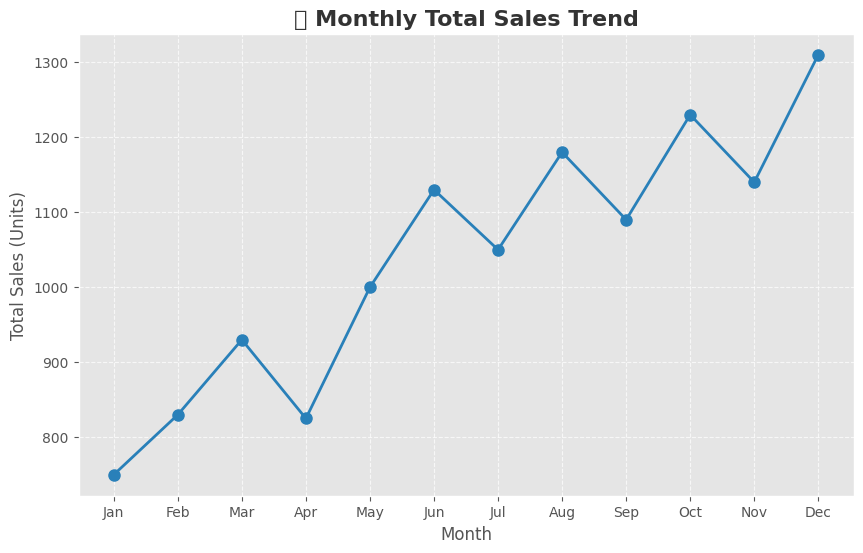

/tmp/ipython-input-2235233000.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOT_DIR, "2_Product_Sales.png"), dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


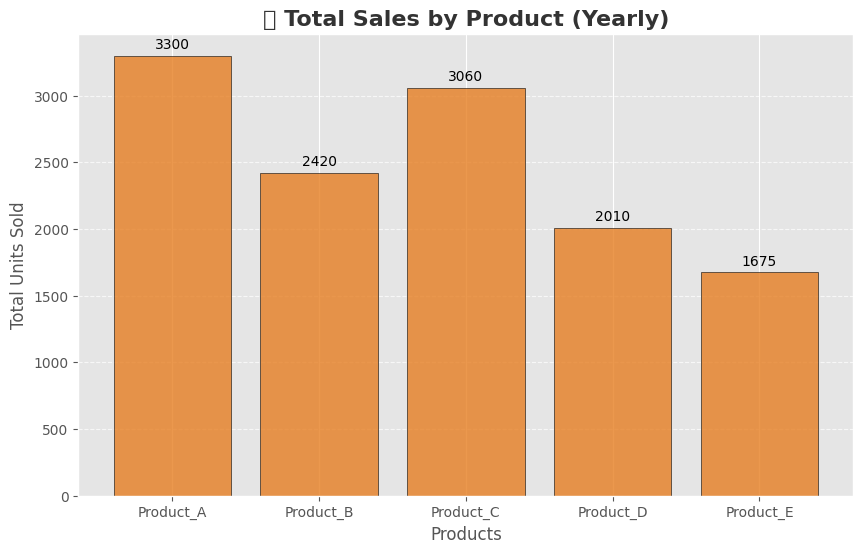

/tmp/ipython-input-2235233000.py:109: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOT_DIR, "3_Customers_vs_Sales.png"), dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


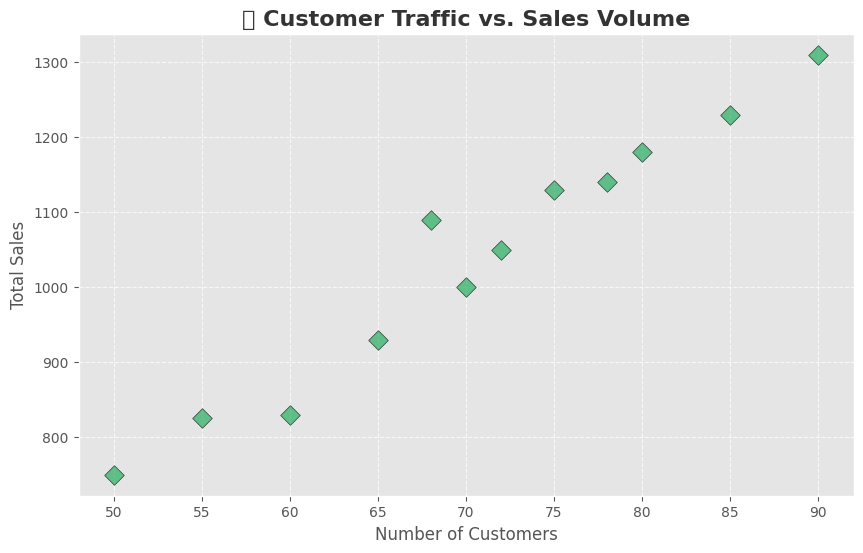

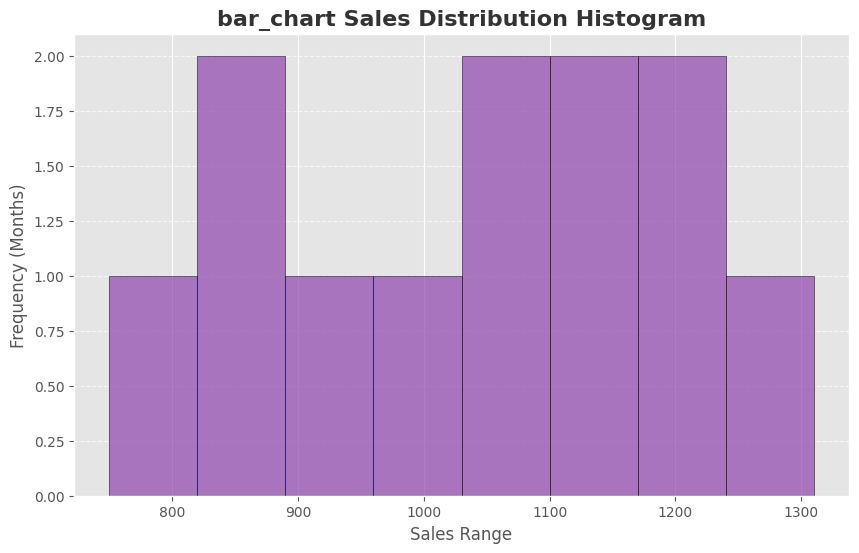

/tmp/ipython-input-2235233000.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # تنظیم فاصله برای تایتل اصلی
/tmp/ipython-input-2235233000.py:153: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOT_DIR, "5_Dashboard_Subplots.png"), dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


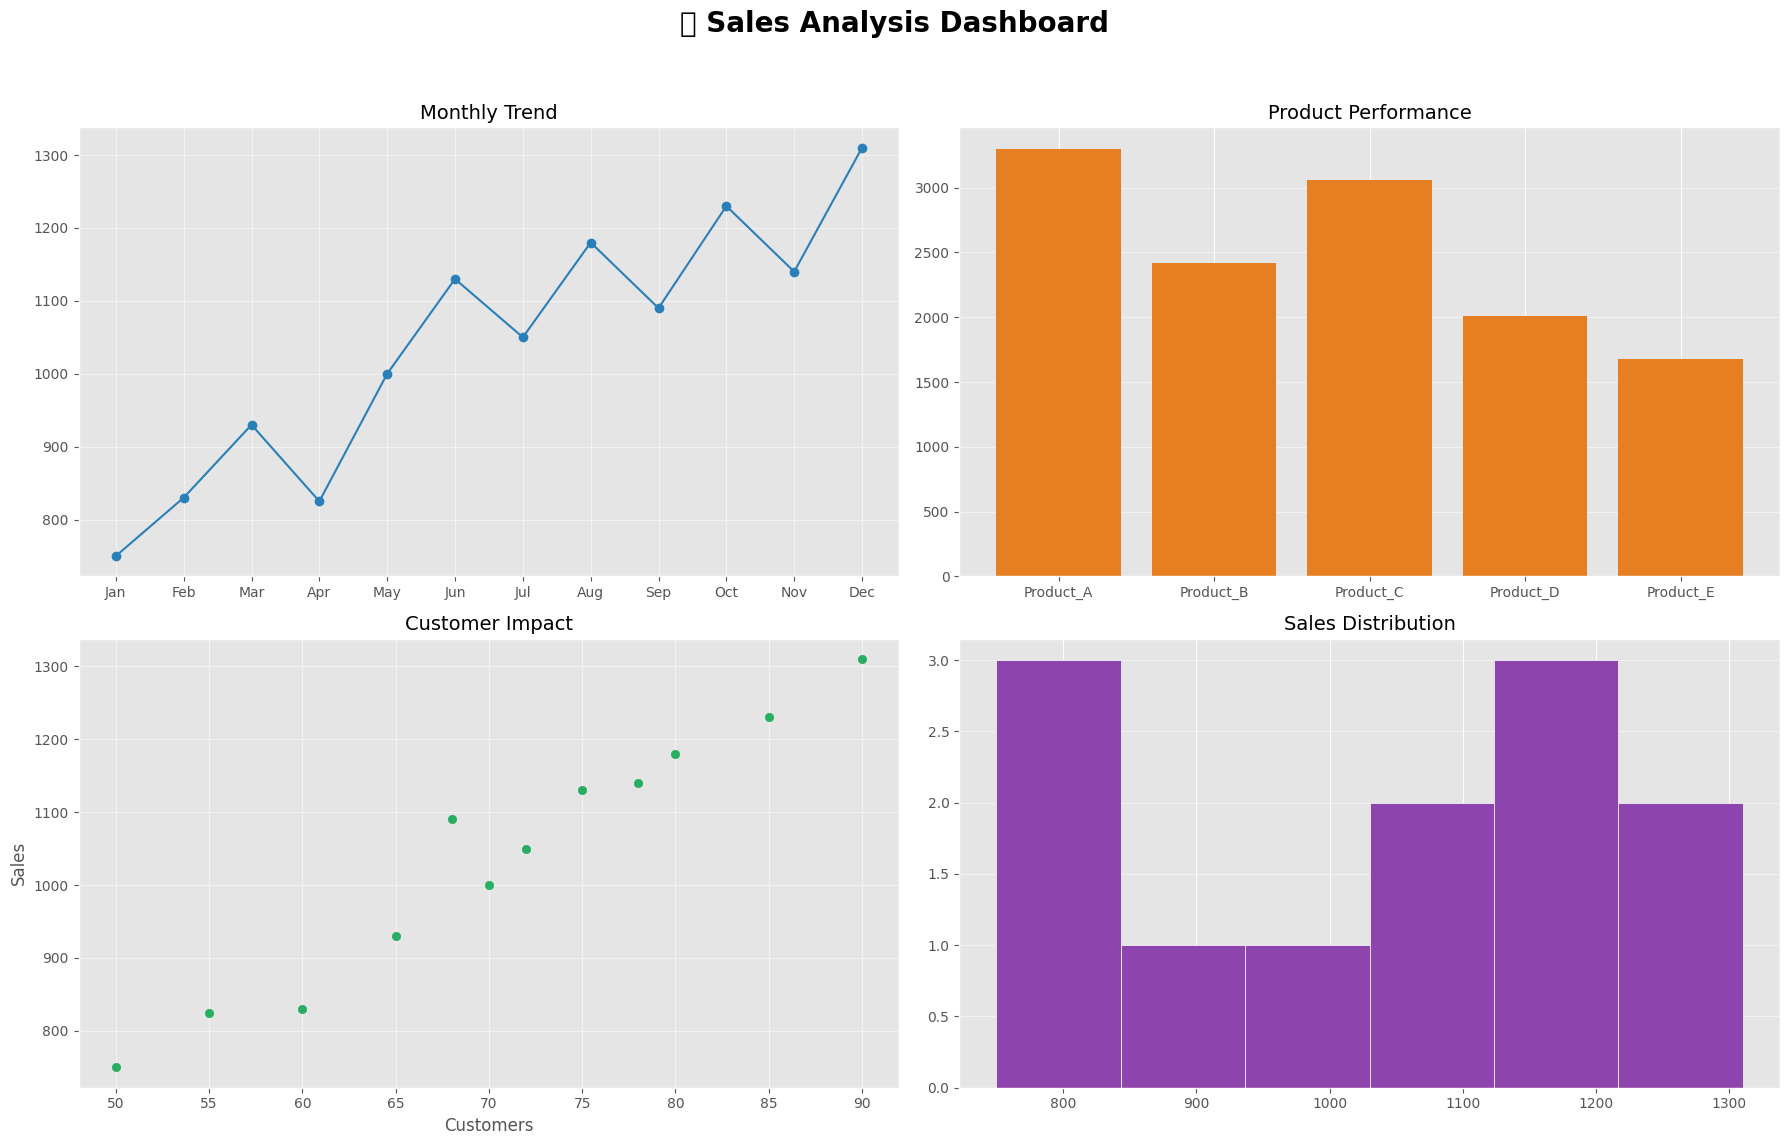

✅ All plots saved successfully in: Sales_Analysis_Project/plots


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. SETUP & CONFIGURATION
# ==========================================
# تنظیم استایل نمودارها برای ظاهر حرفه‌ای‌تر
plt.style.use('ggplot')

# تعریف مسیر پوشه‌ها
DATA_DIR = "Sales_Analysis_Project/data"
PLOT_DIR = "Sales_Analysis_Project/plots"

# ساخت پوشه‌ها در صورت عدم وجود
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(PLOT_DIR, exist_ok=True)

# لیست محصولات برای استفاده در محاسبات
PRODUCT_COLS = ["Product_A", "Product_B", "Product_C", "Product_D", "Product_E"]

# ==========================================
# 2. DATA GENERATION
# ==========================================
csv_content = """Month,Product_A,Product_B,Product_C,Product_D,Product_E,Customers
Jan,200,150,180,120,100,50
Feb,220,160,200,140,110,60
Mar,250,180,230,150,120,65
Apr,210,170,200,130,115,55
May,270,190,250,160,130,70
Jun,300,220,280,180,150,75
Jul,280,200,260,170,140,72
Aug,310,230,290,190,160,80
Sep,290,210,270,175,145,68
Oct,320,240,300,200,170,85
Nov,300,220,280,185,155,78
Dec,350,250,320,210,180,90
"""

csv_path = os.path.join(DATA_DIR, "sales_data.csv")
with open(csv_path, "w") as f:
    f.write(csv_content)

print(f"✅ Dataset created successfully at: {csv_path}")

# ==========================================
# 3. DATA LOADING & ANALYSIS
# ==========================================
df = pd.read_csv(csv_path)

# --- اصلاح مهم: محاسبه مجموع فروش سطر به سطر (axis=1) ---
df["Total_Sales"] = df[PRODUCT_COLS].sum(axis=1)

# محاسبات آماری
stats_summary = df[PRODUCT_COLS].describe().loc[['mean', 'min', 'max']]
total_sales_per_product = df[PRODUCT_COLS].sum()
product_shares = (total_sales_per_product / total_sales_per_product.sum()) * 100

print("\n--- 📊 Statistical Summary ---")
print(stats_summary)
print("\n--- 🏆 Product Sales Share (%) ---")
print(product_shares.round(2))
print("\n--- 📅 Data Preview ---")
print(df.head())

# ==========================================
# 4. VISUALIZATION
# ==========================================

# تنظیمات کلی فونت و رنگ
TITLE_FONT = {'fontsize': 16, 'fontweight': 'bold', 'color': '#333333'}
LABEL_FONT = {'fontsize': 12}

# ----------------------------
# A. Line Plot (Monthly Trend)
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["Total_Sales"], color="#2980b9", marker="o", linestyle="-", linewidth=2, markersize=8)
plt.title("📈 Monthly Total Sales Trend", **TITLE_FONT)
plt.xlabel("Month", **LABEL_FONT)
plt.ylabel("Total Sales (Units)", **LABEL_FONT)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(os.path.join(PLOT_DIR, "1_Monthly_Trend.png"), dpi=300)
plt.show()

# ----------------------------
# B. Bar Chart (Total Sales per Product)
# ----------------------------
# تغییر: به جای فقط ماه دسامبر، کل فروش سال را برای هر محصول نشان می‌دهیم (تحلیل دقیق‌تر)
plt.figure(figsize=(10, 6))
bars = plt.bar(PRODUCT_COLS, total_sales_per_product, color="#e67e22", edgecolor='black', alpha=0.8)
plt.title("📊 Total Sales by Product (Yearly)", **TITLE_FONT)
plt.xlabel("Products", **LABEL_FONT)
plt.ylabel("Total Units Sold", **LABEL_FONT)
plt.bar_label(bars, padding=3) # نمایش عدد روی هر میله
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(PLOT_DIR, "2_Product_Sales.png"), dpi=300)
plt.show()

# ----------------------------
# C. Scatter Plot (Customers vs Sales)
# ----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df["Customers"], df["Total_Sales"], color="#27ae60", marker="D", s=100, edgecolor='black', alpha=0.7)
plt.title("👥 Customer Traffic vs. Sales Volume", **TITLE_FONT)
plt.xlabel("Number of Customers", **LABEL_FONT)
plt.ylabel("Total Sales", **LABEL_FONT)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(os.path.join(PLOT_DIR, "3_Customers_vs_Sales.png"), dpi=300)
plt.show()

# ----------------------------
# D. Histogram (Sales Distribution)
# ----------------------------
plt.figure(figsize=(10, 6))
plt.hist(df["Total_Sales"], bins=8, color="#8e44ad", edgecolor="black", alpha=0.7)
plt.title("bar_chart Sales Distribution Histogram", **TITLE_FONT)
plt.xlabel("Sales Range", **LABEL_FONT)
plt.ylabel("Frequency (Months)", **LABEL_FONT)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(PLOT_DIR, "4_Sales_Histogram.png"), dpi=300)
plt.show()

# ----------------------------
# E. Subplots (Dashboard View)
# ----------------------------
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("🚀 Sales Analysis Dashboard", fontsize=20, fontweight='bold')

# 1. Line
ax[0, 0].plot(df["Month"], df["Total_Sales"], color="#2980b9", marker="o")
ax[0, 0].set_title("Monthly Trend", fontsize=14)
ax[0, 0].grid(True, alpha=0.5)

# 2. Bar
ax[0, 1].bar(PRODUCT_COLS, total_sales_per_product, color="#e67e22")
ax[0, 1].set_title("Product Performance", fontsize=14)
ax[0, 1].grid(axis='y', alpha=0.5)

# 3. Scatter
ax[1, 0].scatter(df["Customers"], df["Total_Sales"], color="#27ae60")
ax[1, 0].set_title("Customer Impact", fontsize=14)
ax[1, 0].set_xlabel("Customers")
ax[1, 0].set_ylabel("Sales")
ax[1, 0].grid(True, alpha=0.5)

# 4. Histogram
ax[1, 1].hist(df["Total_Sales"], bins=6, color="#8e44ad", edgecolor='white')
ax[1, 1].set_title("Sales Distribution", fontsize=14)
ax[1, 1].grid(axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # تنظیم فاصله برای تایتل اصلی
plt.savefig(os.path.join(PLOT_DIR, "5_Dashboard_Subplots.png"), dpi=300)
plt.show()

print(f"✅ All plots saved successfully in: {PLOT_DIR}")